In [1]:
import pandas as pd 
import numpy as np 
import sqlite3
%matplotlib inline 
import seaborn as sns
import matplotlib.pyplot as plt 

In [2]:
conn = sqlite3.connect('inventory.db')
df = pd.read_sql_query('select * from final_table', conn)
df.head()

,VendorName,VendorNumber,Description,Brand,PurchasePrice,ActualPrice,Volume,TotalPurchasesQuantity,TotalPurchasesDollars,TotalSalesDollars,SalesDate,TotalSalesPrice,TotalSalesQuantity,TotalSalesTax,FreightCost,GrossProfit,ProfitMargin,StockTurnOver,SalestoPurchaseRatio
0,BROWN-FORMAN CORP,1128,Jack Daniels No 7 Black,1233,26.27,36.99,1750.0,145080,3811251.60,5.101920e+06,2024-01-02,672819.31,142049.0,260999.20,68601.68,1290667.91,25.297693,0.979108,1.338647
1,MARTIGNETTI COMPANIES,4425,Tito's Handmade Vodka,3405,23.19,28.99,1750.0,164038,3804041.22,4.819073e+06,2024-01-02,561512.37,160247.0,294438.66,209.32,1015032.27,21.062810,0.976890,1.266830
2,MARTIGNETTI COMPANIES,4425,Tito's Handmade Vodka,3405,23.19,28.99,1750.0,164038,3804041.22,4.819073e+06,2024-01-02,561512.37,160247.0,294438.66,144719.92,1015032.27,21.062810,0.976890,1.266830
3,PERNOD RICARD USA,17035,Absolut 80 Proof,8068,18.24,24.99,1750.0,187407,3418303.68,4.538121e+06,2024-01-02,461140.15,187140.0,343854.07,123780.22,1119816.92,24.675786,0.998575,1.327594
4,DIAGEO NORTH AMERICA INC,3960,Capt Morgan Spiced Rum,4261,16.17,22.99,1750.0,201682,3261197.94,4.475973e+06,2024-01-02,420050.01,200412.0,368242.80,257032.07,1214774.94,27.139908,0.993703,1.372493


In [3]:
df.shape

(12489, 19)

# EDA

- in sql we discover all tables and take important columns to the final table to understand patterns in data and relationships between them.

- in this part of EDA , we will analyze the final table to identify key varables , understand patterns and relationships , detect outliers and analyze it we can drop or we can extract some analysis by it and ensure data quality before answer the questions of analysis.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12489 entries, 0 to 12488
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   VendorName              12489 non-null  object 
 1   VendorNumber            12489 non-null  int64  
 2   Description             12489 non-null  object 
 3   Brand                   12489 non-null  int64  
 4   PurchasePrice           12489 non-null  float64
 5   ActualPrice             12489 non-null  float64
 6   Volume                  12489 non-null  float64
 7   TotalPurchasesQuantity  12489 non-null  int64  
 8   TotalPurchasesDollars   12489 non-null  float64
 9   TotalSalesDollars       12489 non-null  float64
 10  SalesDate               12489 non-null  object 
 11  TotalSalesPrice         12489 non-null  float64
 12  TotalSalesQuantity      12489 non-null  float64
 13  TotalSalesTax           12489 non-null  float64
 14  FreightCost             12489 non-null

In [ ]:
# df['SalesDate'] = pd.to_datetime(df['SalesDate'], errors='coerce')

In [11]:
df.describe().T

c:\Users\am123\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,count,mean,min,25%,50%,75%,max,std
VendorNumber,12489.0,9672.998799,2.0,3960.0,4425.0,9552.0,201359.0,17519.491679
Brand,12489.0,18847.561134,58.0,6919.0,19693.0,25827.0,90631.0,12524.98247
PurchasePrice,12489.0,24.892217,0.36,7.14,10.8,20.43,5681.81,103.582221
ActualPrice,12489.0,36.601191,0.49,10.99,16.99,29.99,7499.99,141.237886
Volume,12489.0,838.294819,50.0,750.0,750.0,750.0,20000.0,642.695329
TotalPurchasesQuantity,12489.0,2946.748178,1.0,36.0,240.0,1805.0,337660.0,10618.653774
TotalPurchasesDollars,12489.0,28401.808572,0.71,472.86,3545.64,19227.6,3811251.6,120334.186143
TotalSalesDollars,12489.0,40048.985204,0.0,782.13,5124.79,26505.12,5101919.510001,163562.626925
SalesDate,12280,2024-03-10 01:12:35.179153152,2024-01-01 00:00:00,2024-01-07 00:00:00,2024-01-20 00:00:00,2024-04-09 00:00:00,2024-12-31 00:00:00,NaN
TotalSalesPrice,12489.0,17650.053082,0.0,321.93,2776.4,14819.26,672819.31,42869.130243


- we look the col `GrossProfit` countain a negative numbers , why? maybe this Turn into a loss

- in sales cols we look that eaqual 0 becuase this never sold by vendors.


### we can make some distribution plots for cols to show it more clear.

In [12]:
numerical_cols = df.select_dtypes(include=np.number).columns
numerical_cols

Index(['VendorNumber', 'Brand', 'PurchasePrice', 'ActualPrice', 'Volume',
       'TotalPurchasesQuantity', 'TotalPurchasesDollars', 'TotalSalesDollars',
       'TotalSalesPrice', 'TotalSalesQuantity', 'TotalSalesTax', 'FreightCost',
       'GrossProfit', 'ProfitMargin', 'StockTurnOver', 'SalestoPurchaseRatio'],
      dtype='object')

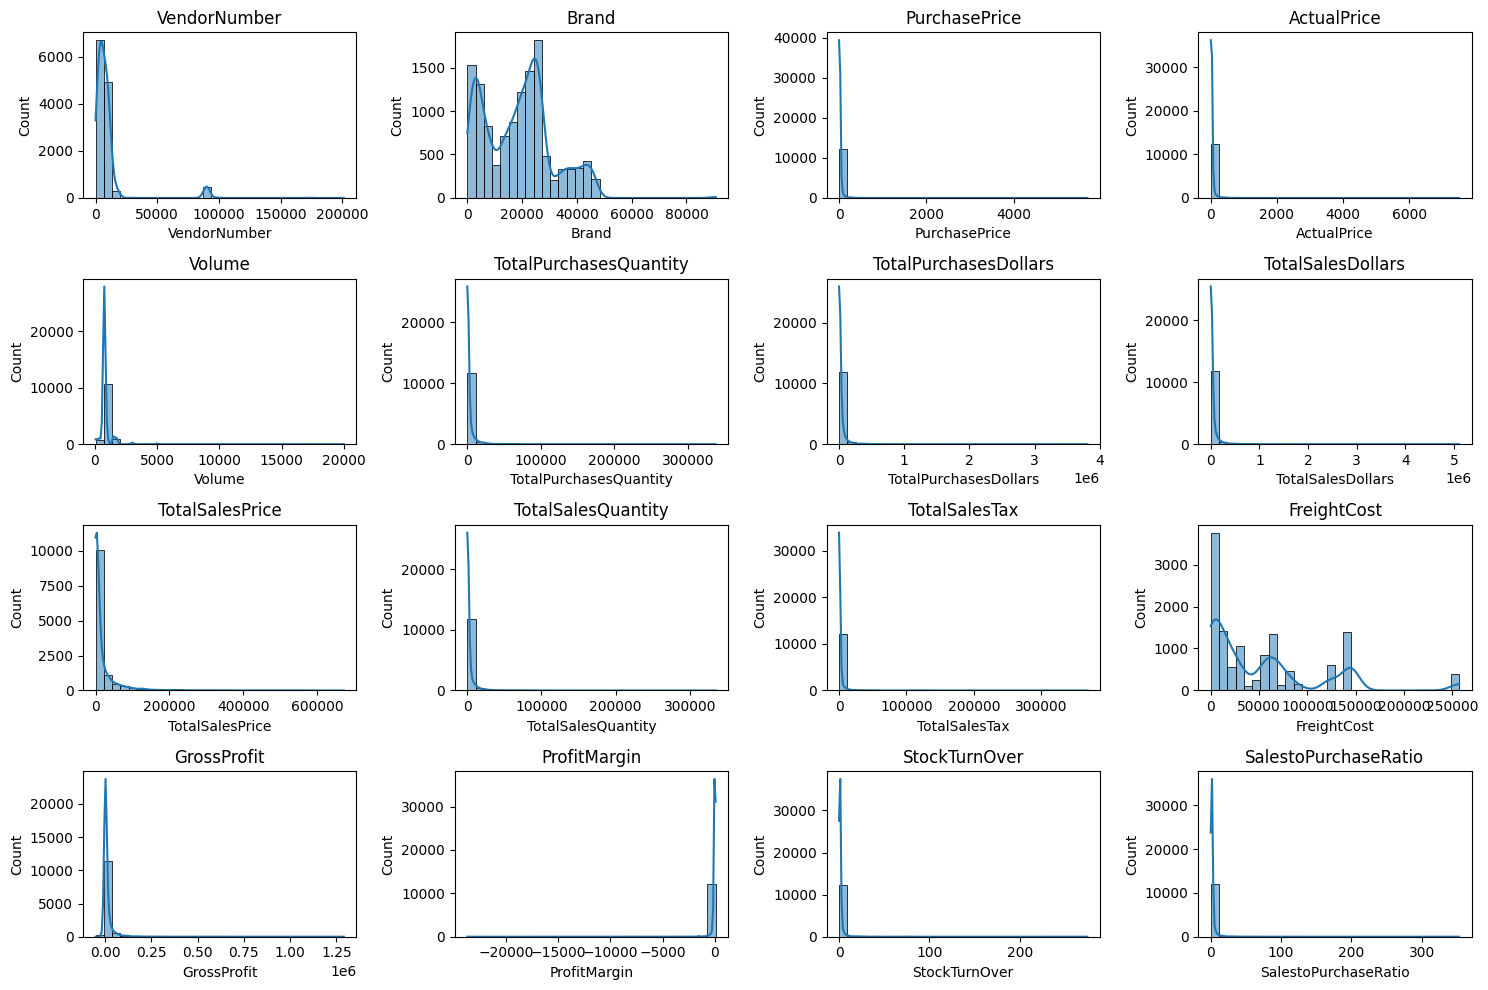

In [13]:
plt.figure(figsize=(15,10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 4, i+1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(col)
plt.tight_layout()
plt.show()

some columns skewed because more of columns foucus on many numbers of purchases or sales (vendors purchase low prices)

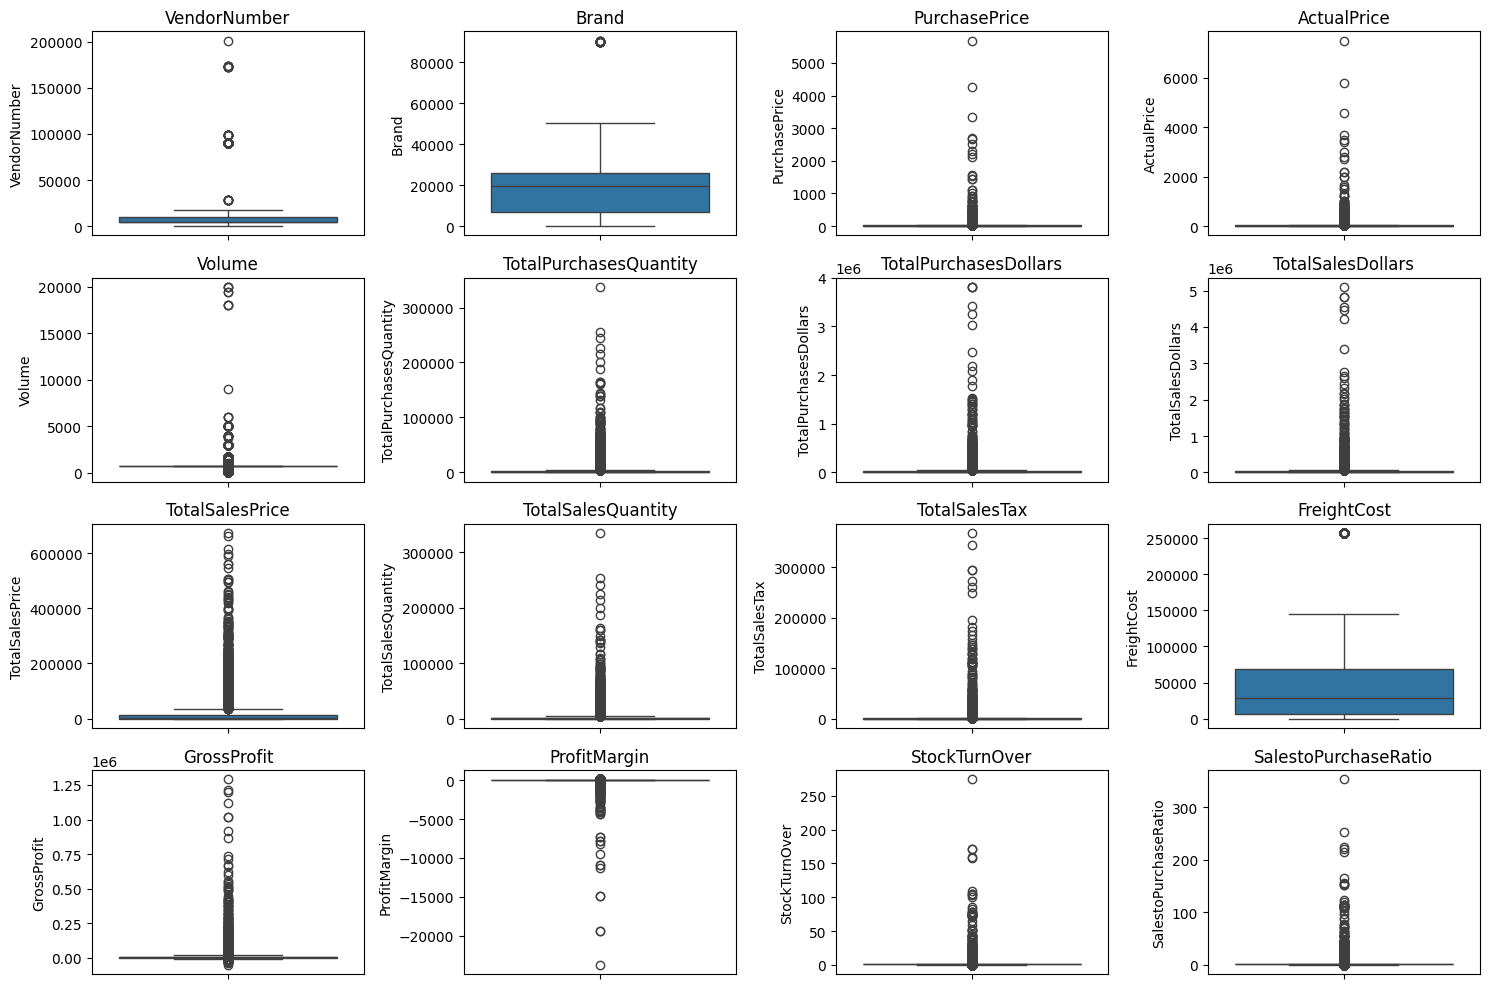

In [14]:
plt.figure(figsize=(15,10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 4, i+1)
    sns.boxplot(df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

- `GrossProfit`: Negative minimum of $-52,002.78$ indicates significant losses due to high costs or excessive discounting.
*There are losing deals resulting from selling products below their cost price, either due to high purchase costs or offering exaggerated discounts*

- `ProfitMargin`: A $-\infty$ minimum highlights critical cases where costs were incurred but zero revenue was generated.
*This is a mathematical case that indicates the existence of products that have costs but zero revenues, which means a complete failure to generate any income from these items.*

- SalesActivity: Zero minimums for quantity and dollars reveal obsolete stock that has failed to sell since purchase.
*Indicates the presence of "stagnant stock" (Obsolete stock); goods that have been purchased, stored, and no item has yet been sold.*

- PricingStrategy: Massive gaps between mean and max prices confirm a product mix of standard and high-value premium items.
*The company deals in two sectors; cheap products (which are the majority) and luxury products (Premium) with very high prices that cause this discrepancy.*

- Logistics: Extreme freight cost variation suggests potential shipping inefficiencies or massive bulk shipment outliers.
*Very large disparity in costs. Explanation: A huge gap indicates very large shipments (Bulk) or logistical inefficiencies that need immediate review to reduce waste.*

- `StockTurnover`: High variance ($0$ to $274.5$) identifies both stagnant items and extreme fast-movers or potential data outliers.
*The number $0$ means complete stagnation, while the number $274.5$ is an anomalous value (Outlier) that means the product rotates almost every day, and this may be a "flying product" or a data defect that needs to be audited.*

### Lets filter the data for real sales and purchases (..>0)

In [15]:
df.head()

,VendorName,VendorNumber,Description,Brand,PurchasePrice,ActualPrice,Volume,TotalPurchasesQuantity,TotalPurchasesDollars,TotalSalesDollars,SalesDate,TotalSalesPrice,TotalSalesQuantity,TotalSalesTax,FreightCost,GrossProfit,ProfitMargin,StockTurnOver,SalestoPurchaseRatio
0,BROWN-FORMAN CORP,1128,Jack Daniels No 7 Black,1233,26.27,36.99,1750.0,145080,3811251.60,5.101920e+06,2024-01-02,672819.31,142049.0,260999.20,68601.68,1290667.91,25.297693,0.979108,1.338647
1,MARTIGNETTI COMPANIES,4425,Tito's Handmade Vodka,3405,23.19,28.99,1750.0,164038,3804041.22,4.819073e+06,2024-01-02,561512.37,160247.0,294438.66,209.32,1015032.27,21.062810,0.976890,1.266830
2,MARTIGNETTI COMPANIES,4425,Tito's Handmade Vodka,3405,23.19,28.99,1750.0,164038,3804041.22,4.819073e+06,2024-01-02,561512.37,160247.0,294438.66,144719.92,1015032.27,21.062810,0.976890,1.266830
3,PERNOD RICARD USA,17035,Absolut 80 Proof,8068,18.24,24.99,1750.0,187407,3418303.68,4.538121e+06,2024-01-02,461140.15,187140.0,343854.07,123780.22,1119816.92,24.675786,0.998575,1.327594
4,DIAGEO NORTH AMERICA INC,3960,Capt Morgan Spiced Rum,4261,16.17,22.99,1750.0,201682,3261197.94,4.475973e+06,2024-01-02,420050.01,200412.0,368242.80,257032.07,1214774.94,27.139908,0.993703,1.372493


In [16]:
df = pd.read_sql_query('select * from final_table where GrossProfit >0 and ProfitMargin>0 and TotalSalesQuantity>0', conn)

In [17]:
df

,VendorName,VendorNumber,Description,Brand,PurchasePrice,ActualPrice,Volume,TotalPurchasesQuantity,TotalPurchasesDollars,TotalSalesDollars,SalesDate,TotalSalesPrice,TotalSalesQuantity,TotalSalesTax,FreightCost,GrossProfit,ProfitMargin,StockTurnOver,SalestoPurchaseRatio
0,BROWN-FORMAN CORP,1128,Jack Daniels No 7 Black,1233,26.27,36.99,1750.0,145080,3811251.60,5.101920e+06,2024-01-02,672819.31,142049.0,260999.20,68601.68,1290667.91,25.297693,0.979108,1.338647
1,MARTIGNETTI COMPANIES,4425,Tito's Handmade Vodka,3405,23.19,28.99,1750.0,164038,3804041.22,4.819073e+06,2024-01-02,561512.37,160247.0,294438.66,209.32,1015032.27,21.062810,0.976890,1.266830
2,MARTIGNETTI COMPANIES,4425,Tito's Handmade Vodka,3405,23.19,28.99,1750.0,164038,3804041.22,4.819073e+06,2024-01-02,561512.37,160247.0,294438.66,144719.92,1015032.27,21.062810,0.976890,1.266830
3,PERNOD RICARD USA,17035,Absolut 80 Proof,8068,18.24,24.99,1750.0,187407,3418303.68,4.538121e+06,2024-01-02,461140.15,187140.0,343854.07,123780.22,1119816.92,24.675786,0.998575,1.327594
4,DIAGEO NORTH AMERICA INC,3960,Capt Morgan Spiced Rum,4261,16.17,22.99,1750.0,201682,3261197.94,4.475973e+06,2024-01-02,420050.01,200412.0,368242.80,257032.07,1214774.94,27.139908,0.993703,1.372493
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9970,WINE GROUP INC,9815,Concannon Glen Ellen Wh Zin,8527,1.32,4.99,750.0,2,2.64,1.595000e+01,2024-01-11,10.96,5.0,0.55,27100.41,13.31,83.448276,2.500000,6.041667
9971,SAZERAC CO INC,8004,Dr McGillicuddy's Apple Pie,5683,0.39,0.49,50.0,6,2.34,6.566000e+01,2024-01-29,1.47,134.0,7.04,50293.62,63.32,96.436186,22.333333,28.059829
9972,HEAVEN HILL DISTILLERIES,3924,Deep Eddy Vodka,9123,0.74,0.99,50.0,2,1.48,1.980000e+00,2024-12-29,0.99,2.0,0.10,14069.87,0.50,25.252525,1.000000,1.337838
9973,DIAGEO NORTH AMERICA INC,3960,The Club Strawbry Margarita,6127,1.47,1.99,200.0,1,1.47,1.432800e+02,2024-01-23,77.61,72.0,15.12,257032.07,141.81,98.974037,72.000000,97.469388


### Ok , lets show top 10 vendors 

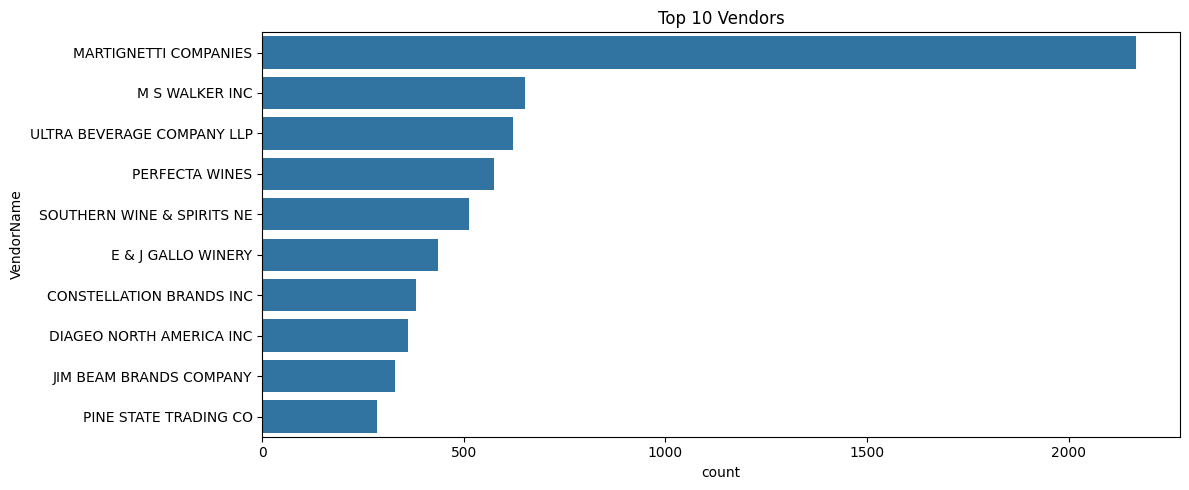

In [18]:
plt.figure(figsize=(12,5))
sns.countplot(y=df['VendorName'], order=df['VendorName'].value_counts().index[:10])
plt.title('Top 10 Vendors')
plt.tight_layout()
plt.show()

### Lets show the relationships between columns by (HEATMAP)

<function matplotlib.pyplot.show(close=None, block=None)>

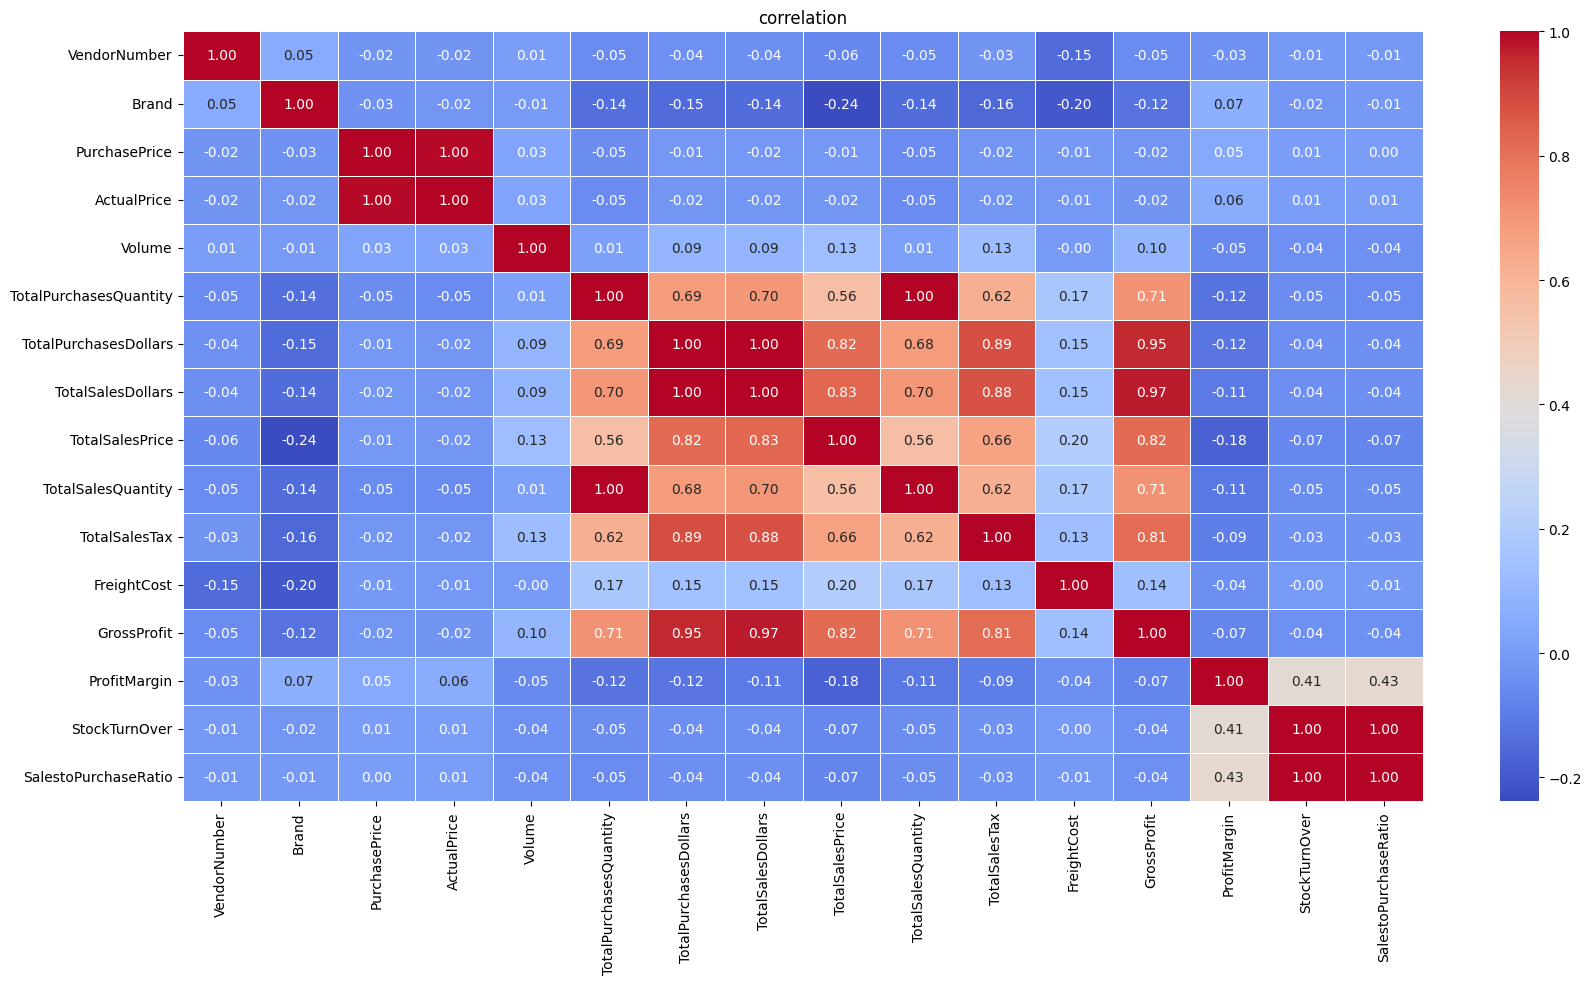

In [19]:
correlation =  df[numerical_cols].corr()
plt.figure(figsize=(20, 10))
sns.heatmap(correlation, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('correlation')
plt.show

### 🔗 Correlation Analysis Key Findings

| Relationship | Correlation | Business Meaning |
| :--- | :--- | :--- |
| **Purchase Price ↔ Revenue/Profit** | **Weak (-0.01)** | Changes in cost don't drive significant changes in total profit or sales. |
| **Purchase Qty ↔ Sales Qty** | **Strong (0.99)** | Near-perfect alignment between buying and selling; high efficiency or direct-to-order model. |
| **Sales Price ↔ Profit Margin** | **Negative (-0.18)** | Higher-priced items tend to have tighter (lower) profit margins. |
| **Stock Turnover ↔ Profitability** | **Negative (-0.04)** | Selling faster is NOT currently leading to more profit; focus on quality of sales over speed. |

# Lets go answer questions of stackholder

### 1- identify the brands need to promoting or pricing adjustments

In [20]:
df.head()

,VendorName,VendorNumber,Description,Brand,PurchasePrice,ActualPrice,Volume,TotalPurchasesQuantity,TotalPurchasesDollars,TotalSalesDollars,SalesDate,TotalSalesPrice,TotalSalesQuantity,TotalSalesTax,FreightCost,GrossProfit,ProfitMargin,StockTurnOver,SalestoPurchaseRatio
0,BROWN-FORMAN CORP,1128,Jack Daniels No 7 Black,1233,26.27,36.99,1750.0,145080,3811251.60,5.101920e+06,2024-01-02,672819.31,142049.0,260999.20,68601.68,1290667.91,25.297693,0.979108,1.338647
1,MARTIGNETTI COMPANIES,4425,Tito's Handmade Vodka,3405,23.19,28.99,1750.0,164038,3804041.22,4.819073e+06,2024-01-02,561512.37,160247.0,294438.66,209.32,1015032.27,21.062810,0.976890,1.266830
2,MARTIGNETTI COMPANIES,4425,Tito's Handmade Vodka,3405,23.19,28.99,1750.0,164038,3804041.22,4.819073e+06,2024-01-02,561512.37,160247.0,294438.66,144719.92,1015032.27,21.062810,0.976890,1.266830
3,PERNOD RICARD USA,17035,Absolut 80 Proof,8068,18.24,24.99,1750.0,187407,3418303.68,4.538121e+06,2024-01-02,461140.15,187140.0,343854.07,123780.22,1119816.92,24.675786,0.998575,1.327594
4,DIAGEO NORTH AMERICA INC,3960,Capt Morgan Spiced Rum,4261,16.17,22.99,1750.0,201682,3261197.94,4.475973e+06,2024-01-02,420050.01,200412.0,368242.80,257032.07,1214774.94,27.139908,0.993703,1.372493


In [21]:
Brand_performance = df.groupby('Description').agg({'TotalSalesDollars':'sum',
                            'ProfitMargin':'mean'}).reset_index()
Brand_performance                          

,Description,TotalSalesDollars,ProfitMargin
0,(RI) 1,21519.09,18.060661
1,.nparalleled Svgn Blanc,1094.63,29.978166
2,10 Span Cab Svgn CC,2703.89,20.937612
3,10 Span Chard CC,3325.56,27.806445
4,10 Span Pnt Gris Monterey Cy,2082.22,32.226182
...,...,...,...
7702,Zorvino Vyds Sangiovese,10579.03,29.525675
7703,Zuccardi Q Malbec,1639.18,23.981503
7704,Zum Rsl,10857.34,32.675038
7705,Zwack Liqueur,227.88,16.653502


In [22]:
low_dollar_sales = Brand_performance['TotalSalesDollars'].quantile(0.15)
high_profit_margin = Brand_performance['ProfitMargin'].quantile(0.85)

In [23]:
Identify_Brands = Brand_performance[(Brand_performance['TotalSalesDollars'] <= low_dollar_sales) &
                                    (Brand_performance['ProfitMargin'] >= high_profit_margin)]

Identify_Brands.sort_values('TotalSalesDollars')

,Description,TotalSalesDollars,ProfitMargin
6199,Santa Rita Organic Svgn Bl,9.99,66.466466
2369,Debauchery Pnt Nr,11.58,65.975820
2070,Concannon Glen Ellen Wh Zin,15.95,83.448276
2188,Crown Royal Apple,27.86,89.806174
6237,Sauza Sprklg Wild Berry Marg,27.96,82.153076
...,...,...,...
4817,Merriam Cab Franc Windacre V,594.83,80.523847
3479,Harthill Farms Cab Svgn,595.03,89.956809
5530,Philippe Herard Bl de Blanc,607.24,71.174494
4616,Malibu Cosmo Light RTD,610.59,66.537284


- These brands have high profit margins but low sales, so instead of lowering prices, the company should focus on increasing marketing and visibility to boost revenue while keeping profitability high.

### scatter plot to visualize this feild more clear :

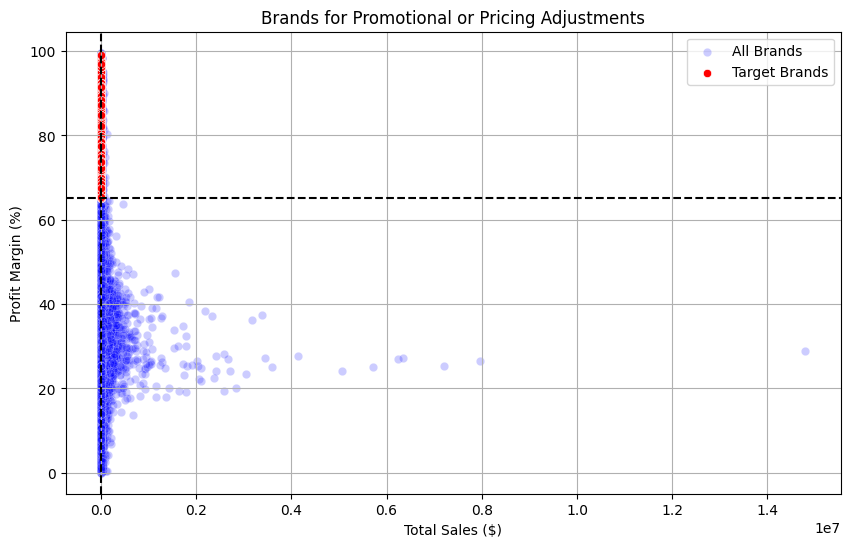

In [24]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=Brand_performance,x='TotalSalesDollars', y='ProfitMargin',color="blue",label="All Brands",alpha=0.2)
sns.scatterplot(data=Identify_Brands,x='TotalSalesDollars',y='ProfitMargin',color="red",label="Target Brands")

plt.axhline(high_profit_margin, linestyle='--', color='black')
plt.axvline(low_dollar_sales, linestyle='--', color='black')
plt.xlabel("Total Sales ($)")
plt.ylabel("Profit Margin (%)")
plt.title("Brands for Promotional or Pricing Adjustments")
plt.legend()
plt.grid(True)
plt.show()

### we will filter `TotalSalesDollars` for better visualization

In [25]:
Brand_performance = Brand_performance[Brand_performance['TotalSalesDollars'] <= 10000]

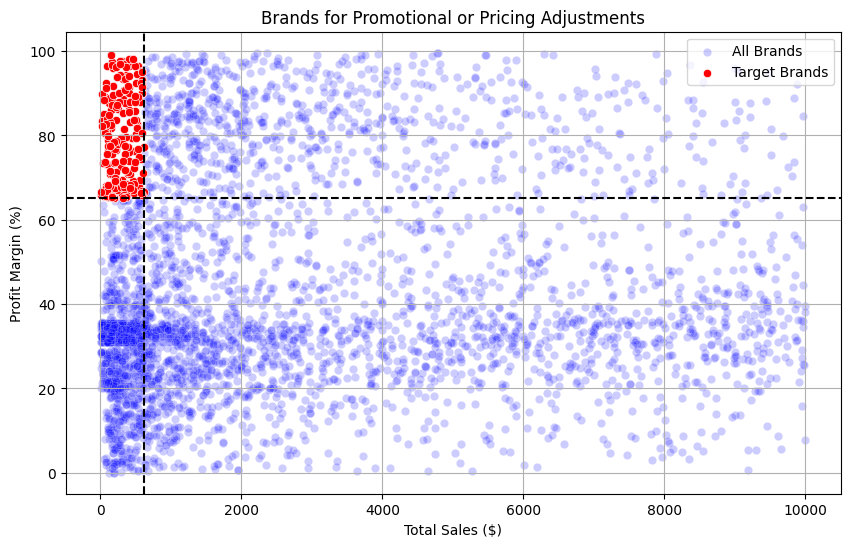

In [26]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=Brand_performance,x='TotalSalesDollars', y='ProfitMargin',color="blue",label="All Brands",alpha=0.2)
sns.scatterplot(data=Identify_Brands,x='TotalSalesDollars',y='ProfitMargin',color="red",label="Target Brands")

plt.axhline(high_profit_margin, linestyle='--', color='black')
plt.axvline(low_dollar_sales, linestyle='--', color='black')
plt.xlabel("Total Sales ($)")
plt.ylabel("Profit Margin (%)")
plt.title("Brands for Promotional or Pricing Adjustments")
plt.legend()
plt.grid(True)
plt.show()

In [27]:
import plotly.express as px
import plotly.graph_objects as go


fig = px.scatter(
    Brand_performance,
    x="TotalSalesDollars",
    y="ProfitMargin",
    opacity=0.3,
    labels={
        "TotalSalesDollars": "Total Sales ($)",
        "ProfitMargin": "Profit Margin (%)"
    },
    title="Brands for Promotional or Pricing Adjustments"
)

fig.update_traces(marker=dict(color="blue"), name="All Brands")

fig.add_trace(
    go.Scatter(
        x=Identify_Brands["TotalSalesDollars"],
        y=Identify_Brands["ProfitMargin"],
        mode="markers",
        marker=dict(color="red", size=8),
        name="Target Brands"
    )

)
fig.add_hline(
    y=high_profit_margin,
    line_dash="dash",
    line_color="black",
    annotation_text="High Margin Threshold"
)

fig.add_vline(
    x=low_dollar_sales,
    line_dash="dash",
    line_color="black",
    annotation_text="Low Sales Threshold"
)

fig.show()

### 2- Determine top vendors contributing to sales and gross profit.

In [28]:
top_vendors = df.groupby('VendorName')['TotalSalesDollars'].sum().nlargest(10)
top_brands= df.groupby('Description')['TotalSalesDollars'].sum().nlargest(10)

In [29]:
top_vendors

VendorName
MARTIGNETTI COMPANIES         7.866072e+07
DIAGEO NORTH AMERICA INC      6.799010e+07
PERNOD RICARD USA             3.206320e+07
JIM BEAM BRANDS COMPANY       3.142302e+07
BACARDI USA INC               2.485482e+07
CONSTELLATION BRANDS INC      2.421875e+07
E & J GALLO WINERY            1.839990e+07
BROWN-FORMAN CORP             1.824723e+07
ULTRA BEVERAGE COMPANY LLP    1.650254e+07
M S WALKER INC                1.470646e+07
Name: TotalSalesDollars, dtype: float64

In [30]:
top_brands

Description
Tito's Handmade Vodka      14799315.16
Jack Daniels No 7 Black     7964746.76
Grey Goose Vodka            7209608.06
Capt Morgan Spiced Rum      6356320.62
Absolut 80 Proof            6244752.03
Jameson Irish Whiskey       5715759.69
Ketel One Vodka             5070083.56
Baileys Irish Cream         4150122.07
Kahlua                      3604858.66
Tanqueray                   3456697.90
Name: TotalSalesDollars, dtype: float64

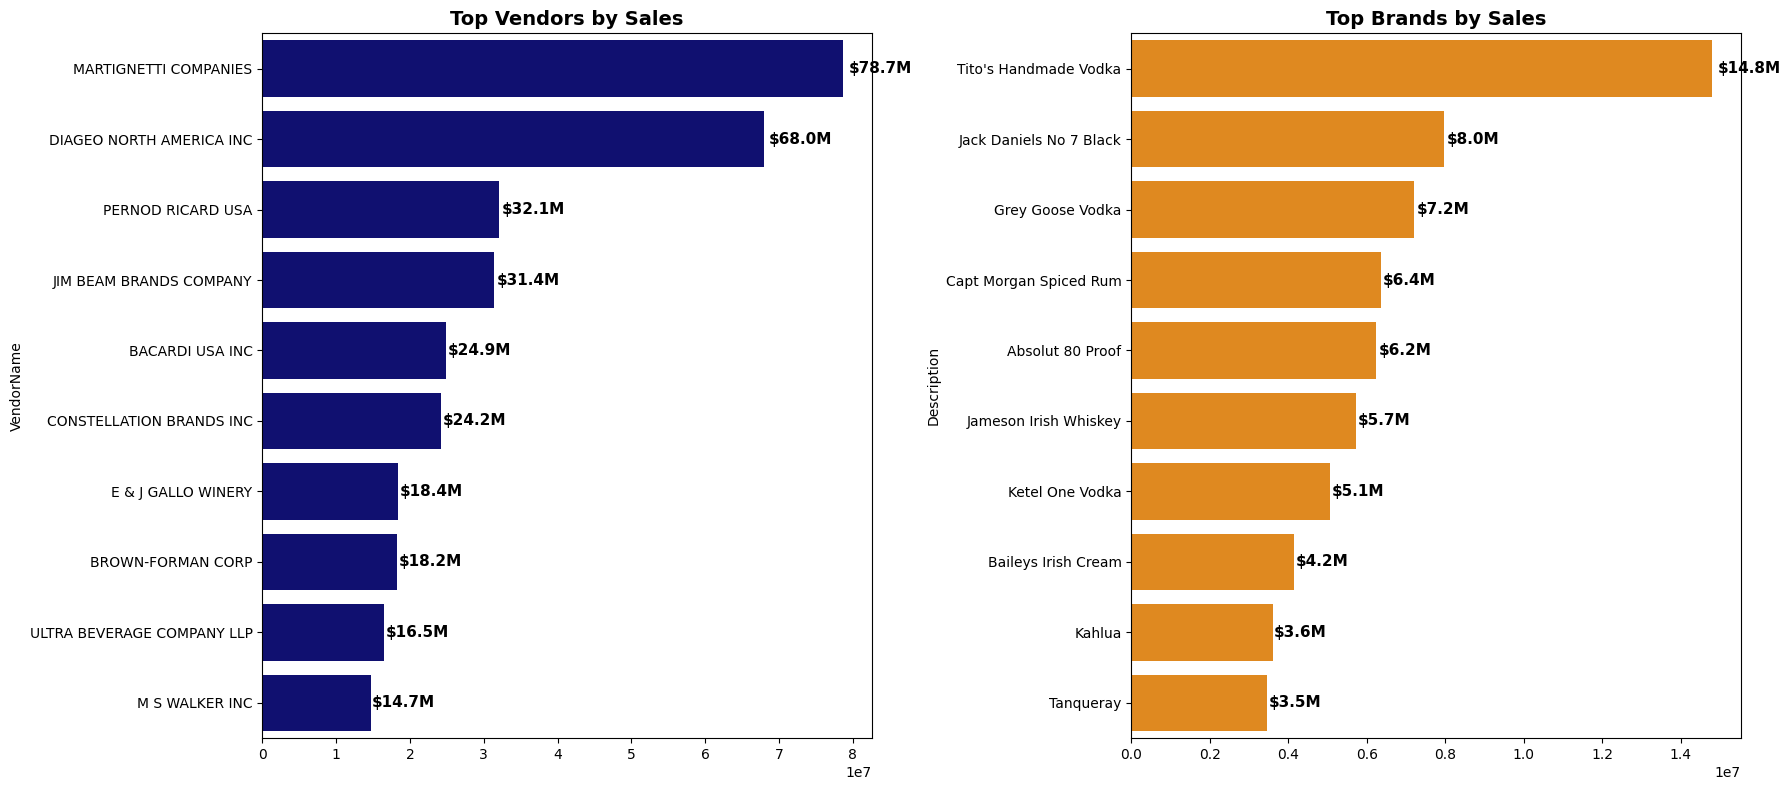

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

def format_currency(x):
    if x >= 1_000_000:
        return f"${x/1_000_000:.1f}M"
    elif x >= 1_000:
        return f"${x/1_000:.1f}K"
    else:
        return f"${x:,.0f}"

fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# -------- Top Vendors --------
sns.barplot(
    x=top_vendors.values,
    y=top_vendors.index,
    ax=axes[0],
    color="navy"
)

axes[0].set_title("Top Vendors by Sales", fontsize=14, fontweight="bold")

for i, value in enumerate(top_vendors.values):
    axes[0].text(
        value * 1.01,   
        i,
        format_currency(value),
        va='center',
        fontsize=11,
        fontweight='bold'
    )

# -------- Top Brands --------
sns.barplot(
    x=top_brands.values,
    y=top_brands.index,
    ax=axes[1],
    color="darkorange"
)

axes[1].set_title("Top Brands by Sales", fontsize=14, fontweight="bold")

for i, value in enumerate(top_brands.values):
    axes[1].text(
        value * 1.01,
        i,
        format_currency(value),
        va='center',
        fontsize=11,
        fontweight='bold'
    )

plt.tight_layout()
plt.show()


### 3- which vendors contribute the most to total purchase dollars?

In [32]:
df.head(1)

,VendorName,VendorNumber,Description,Brand,PurchasePrice,ActualPrice,Volume,TotalPurchasesQuantity,TotalPurchasesDollars,TotalSalesDollars,SalesDate,TotalSalesPrice,TotalSalesQuantity,TotalSalesTax,FreightCost,GrossProfit,ProfitMargin,StockTurnOver,SalestoPurchaseRatio
0,BROWN-FORMAN CORP,1128,Jack Daniels No 7 Black,1233,26.27,36.99,1750.0,145080,3811251.6,5.101920e+06,2024-01-02,672819.31,142049.0,260999.2,68601.68,1290667.91,25.297693,0.979108,1.338647


In [33]:
vendor_purchases = df.groupby('VendorName').agg({'TotalPurchasesDollars':'sum',
                                                 'GrossProfit':'sum',
                                                 'TotalSalesDollars':'sum'}).reset_index()
vendor_purchases

,VendorName,TotalPurchasesDollars,GrossProfit,TotalSalesDollars
0,ADAMBA IMPORTS INTL INC,446.16,258.37,704.53
1,ALISA CARR BEVERAGES,25698.12,78772.82,104470.94
2,ALTAMAR BRANDS LLC,11706.20,4000.61,15706.81
3,AMERICAN SPIRITS EXCHANGE,934.08,577.08,1511.16
4,AMERICAN VINTAGE BEVERAGE,104435.68,35167.85,139603.53
...,...,...,...,...
114,WEIN BAUER INC,42694.64,13522.49,56217.13
115,WESTERN SPIRITS BEVERAGE CO,298416.86,106837.97,405254.83
116,WILLIAM GRANT & SONS INC,5876538.26,1693337.94,7569876.20
117,WINE GROUP INC,5203801.17,3100242.11,8304043.28


- lets make col that provide PurchaseConribution by %

In [34]:
vendor_purchases['PurchaseConribution%'] = vendor_purchases['TotalPurchasesDollars'] / vendor_purchases['TotalPurchasesDollars'].sum()

In [35]:
vendor_purchases = round(vendor_purchases.sort_values('PurchaseConribution%', ascending=False), 2)
vendor_purchases

,VendorName,TotalPurchasesDollars,GrossProfit,TotalSalesDollars,PurchaseConribution%
57,MARTIGNETTI COMPANIES,51004191.66,27656527.06,78660718.72,0.15
25,DIAGEO NORTH AMERICA INC,50097226.16,17892873.26,67990099.42,0.15
68,PERNOD RICARD USA,23851164.17,8212032.02,32063196.19,0.07
46,JIM BEAM BRANDS COMPANY,23494304.32,7928716.14,31423020.46,0.07
6,BACARDI USA INC,17432020.26,7422796.88,24854817.14,0.05
...,...,...,...,...,...
33,FANTASY FINE WINES CORP,128.64,198.95,327.59,0.00
107,UNCORKED,118.74,58.20,176.94,0.00
85,SILVER MOUNTAIN CIDERS,77.18,265.33,342.51,0.00
16,CAPSTONE INTERNATIONAL,54.64,192.23,246.87,0.00


- we can handle numbers by apply format dollars

In [36]:
top_vendors = vendor_purchases.head(10).copy() 
top_vendors['TotalPurchasesDollars'] = top_vendors['TotalPurchasesDollars'].apply(format_currency)
top_vendors['GrossProfit'] = top_vendors['GrossProfit'].apply(format_currency)
top_vendors['TotalSalesDollars'] = top_vendors['TotalSalesDollars'].apply(format_currency)
top_vendors

,VendorName,TotalPurchasesDollars,GrossProfit,TotalSalesDollars,PurchaseConribution%
57,MARTIGNETTI COMPANIES,$51.0M,$27.7M,$78.7M,0.15
25,DIAGEO NORTH AMERICA INC,$50.1M,$17.9M,$68.0M,0.15
68,PERNOD RICARD USA,$23.9M,$8.2M,$32.1M,0.07
46,JIM BEAM BRANDS COMPANY,$23.5M,$7.9M,$31.4M,0.07
6,BACARDI USA INC,$17.4M,$7.4M,$24.9M,0.05
20,CONSTELLATION BRANDS INC,$15.3M,$8.9M,$24.2M,0.05
11,BROWN-FORMAN CORP,$13.2M,$5.0M,$18.2M,0.04
30,E & J GALLO WINERY,$12.1M,$6.3M,$18.4M,0.04
106,ULTRA BEVERAGE COMPANY LLP,$11.2M,$5.3M,$16.5M,0.03
53,M S WALKER INC,$9.8M,$4.9M,$14.7M,0.03


- ok , this is a top 10 vendors , what about all vendors ?? we can discover `PurchaseConribution%` to identify the perecntage about all vendors that purchases 

In [37]:
top_vendors['PurchaseConribution%'].value_counts()

PurchaseConribution%
0.15    2
0.07    2
0.05    2
0.04    2
0.03    2
Name: count, dtype: int64

In [38]:
top_vendors['PurchaseConribution%'].sum()

0.68

- Only 10 vendors have a reasonable percentage of purchases, while the rest are almost close to zero

- we will use Cumulative Contribution to show are the vendors out of top 10 help business and affective in PurchaseConribution or NO

In [39]:
top_vendors['CumulativeContribution'] = top_vendors['PurchaseConribution%'].cumsum() *100
top_vendors

,VendorName,TotalPurchasesDollars,GrossProfit,TotalSalesDollars,PurchaseConribution%,CumulativeContribution
57,MARTIGNETTI COMPANIES,$51.0M,$27.7M,$78.7M,0.15,15.0
25,DIAGEO NORTH AMERICA INC,$50.1M,$17.9M,$68.0M,0.15,30.0
68,PERNOD RICARD USA,$23.9M,$8.2M,$32.1M,0.07,37.0
46,JIM BEAM BRANDS COMPANY,$23.5M,$7.9M,$31.4M,0.07,44.0
6,BACARDI USA INC,$17.4M,$7.4M,$24.9M,0.05,49.0
20,CONSTELLATION BRANDS INC,$15.3M,$8.9M,$24.2M,0.05,54.0
11,BROWN-FORMAN CORP,$13.2M,$5.0M,$18.2M,0.04,58.0
30,E & J GALLO WINERY,$12.1M,$6.3M,$18.4M,0.04,62.0
106,ULTRA BEVERAGE COMPANY LLP,$11.2M,$5.3M,$16.5M,0.03,65.0
53,M S WALKER INC,$9.8M,$4.9M,$14.7M,0.03,68.0


### 📈 Pareto Analysis: Vendor Contribution Summary

| Action | Technical Method | Business Goal |
| :--- | :--- | :--- |
| **Summing Contributions** | `.cumsum()` on Purchase % | Identify where the bulk of the money is spent. |
| **80/20 Identification** | Cumulative % Tracking | Focus management on the top 10 vendors (the "Vital Few"). |
| **Operational Efficiency** | Filtering Zero-impact Vendors | Reduce administrative overhead by automating small vendors. |

C:\Users\am123\AppData\Local\Temp\ipykernel_2824\221010078.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\am123\AppData\Local\Temp\ipykernel_2824\221010078.py:14: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



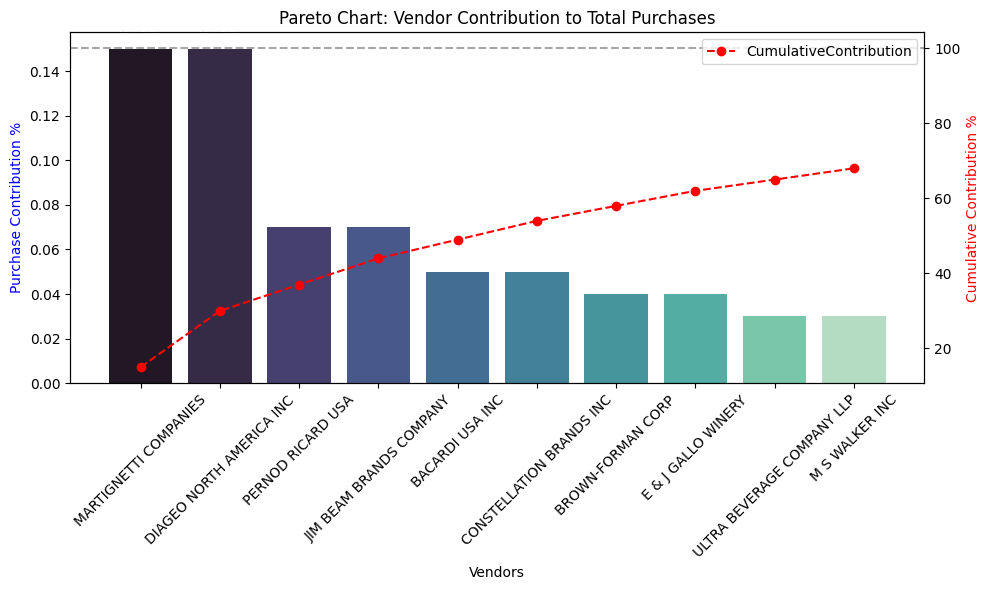

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax1 = plt.subplots(figsize=(10, 6))

sns.barplot(x=top_vendors['VendorName'], y=top_vendors['PurchaseConribution%'], palette="mako", ax=ax1)

for i, value in enumerate(top_vendors['PurchaseConribution%']):
    ax1.text(i, value + 0.005, str(value)+'%', ha='center', fontsize=10, color='white')

ax2 = ax1.twinx()
ax2.plot(top_vendors['VendorName'], top_vendors['CumulativeContribution'], color='red', marker='o', linestyle='dashed', label='CumulativeContribution')

ax1.set_xticklabels(top_vendors['VendorName'], rotation=45)
ax1.set_ylabel('Purchase Contribution %', color='blue')
ax2.set_ylabel('Cumulative Contribution %', color='red')
ax1.set_xlabel('Vendors')
ax1.set_title('Pareto Chart: Vendor Contribution to Total Purchases')

ax2.axhline(y=100, color='gray', linestyle='dashed', alpha=0.7)
ax2.legend(loc='upper right')
plt.tight_layout()
plt.show()

- *This visualization illustrates vendor performance by displaying individual purchase contributions via bar plots and the cumulative impact through a line plot to identify the top suppliers who dominate total purchases*.

### 4- how much of total procurement is dependent on the top vendors

In [41]:
print(f"total Purchase Conribution of top 10 vendors is {round(top_vendors['PurchaseConribution%'].sum(),2)} %")

total Purchase Conribution of top 10 vendors is 0.68 %


- other vendors is 32%

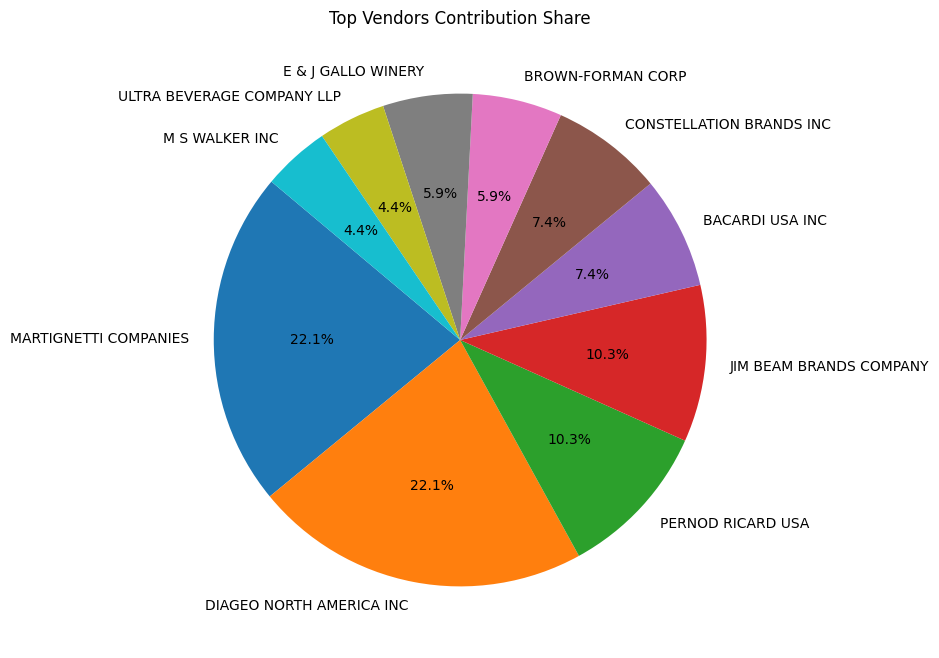

In [42]:
plt.figure(facecolor='white', figsize=(8, 8)) 

vendor_values = top_vendors['PurchaseConribution%'] 
vendor_labels = top_vendors['VendorName'] 

plt.pie(vendor_values, labels=vendor_labels, autopct='%1.1f%%', startangle=140)
plt.title('Top Vendors Contribution Share')
plt.show()

### 5- Does purchasing in bulk reduce the unit price, and what is the optimal purchase volume for cost savings?

In [43]:
df['UnitPurchasePrice'] = df['TotalPurchasesDollars'] / df['TotalPurchasesQuantity']

In [44]:
df.head()

,VendorName,VendorNumber,Description,Brand,PurchasePrice,ActualPrice,Volume,TotalPurchasesQuantity,TotalPurchasesDollars,TotalSalesDollars,SalesDate,TotalSalesPrice,TotalSalesQuantity,TotalSalesTax,FreightCost,GrossProfit,ProfitMargin,StockTurnOver,SalestoPurchaseRatio,UnitPurchasePrice
0,BROWN-FORMAN CORP,1128,Jack Daniels No 7 Black,1233,26.27,36.99,1750.0,145080,3811251.60,5.101920e+06,2024-01-02,672819.31,142049.0,260999.20,68601.68,1290667.91,25.297693,0.979108,1.338647,26.27
1,MARTIGNETTI COMPANIES,4425,Tito's Handmade Vodka,3405,23.19,28.99,1750.0,164038,3804041.22,4.819073e+06,2024-01-02,561512.37,160247.0,294438.66,209.32,1015032.27,21.062810,0.976890,1.266830,23.19
2,MARTIGNETTI COMPANIES,4425,Tito's Handmade Vodka,3405,23.19,28.99,1750.0,164038,3804041.22,4.819073e+06,2024-01-02,561512.37,160247.0,294438.66,144719.92,1015032.27,21.062810,0.976890,1.266830,23.19
3,PERNOD RICARD USA,17035,Absolut 80 Proof,8068,18.24,24.99,1750.0,187407,3418303.68,4.538121e+06,2024-01-02,461140.15,187140.0,343854.07,123780.22,1119816.92,24.675786,0.998575,1.327594,18.24
4,DIAGEO NORTH AMERICA INC,3960,Capt Morgan Spiced Rum,4261,16.17,22.99,1750.0,201682,3261197.94,4.475973e+06,2024-01-02,420050.01,200412.0,368242.80,257032.07,1214774.94,27.139908,0.993703,1.372493,16.17


In [45]:
df['OrderSize'] = pd.qcut(df['TotalPurchasesQuantity'], q=3, labels=['Small', 'Medium', 'Large'])

In [46]:
df[['OrderSize', 'TotalPurchasesQuantity']]

,OrderSize,TotalPurchasesQuantity
0,Large,145080
1,Large,164038
2,Large,164038
3,Large,187407
4,Large,201682
...,...,...
9970,Small,2
9971,Small,6
9972,Small,2
9973,Small,1


- lets look the unit purhase for every size

In [47]:
df.groupby('OrderSize')[['UnitPurchasePrice']].mean()

C:\Users\am123\AppData\Local\Temp\ipykernel_2824\1505448859.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



,UnitPurchasePrice
OrderSize,
Small,40.746692
Medium,15.588058
Large,10.873970


- this analysis shows that stratigic of large purchases is good that allow to vendor purchases much products with low prices.

### 6- which vendors have low inventory turnover , indicating excess stock and slow moving products?

In [48]:
df.head()

,VendorName,VendorNumber,Description,Brand,PurchasePrice,ActualPrice,Volume,TotalPurchasesQuantity,TotalPurchasesDollars,TotalSalesDollars,...,TotalSalesPrice,TotalSalesQuantity,TotalSalesTax,FreightCost,GrossProfit,ProfitMargin,StockTurnOver,SalestoPurchaseRatio,UnitPurchasePrice,OrderSize
0,BROWN-FORMAN CORP,1128,Jack Daniels No 7 Black,1233,26.27,36.99,1750.0,145080,3811251.60,5.101920e+06,...,672819.31,142049.0,260999.20,68601.68,1290667.91,25.297693,0.979108,1.338647,26.27,Large
1,MARTIGNETTI COMPANIES,4425,Tito's Handmade Vodka,3405,23.19,28.99,1750.0,164038,3804041.22,4.819073e+06,...,561512.37,160247.0,294438.66,209.32,1015032.27,21.062810,0.976890,1.266830,23.19,Large
2,MARTIGNETTI COMPANIES,4425,Tito's Handmade Vodka,3405,23.19,28.99,1750.0,164038,3804041.22,4.819073e+06,...,561512.37,160247.0,294438.66,144719.92,1015032.27,21.062810,0.976890,1.266830,23.19,Large
3,PERNOD RICARD USA,17035,Absolut 80 Proof,8068,18.24,24.99,1750.0,187407,3418303.68,4.538121e+06,...,461140.15,187140.0,343854.07,123780.22,1119816.92,24.675786,0.998575,1.327594,18.24,Large
4,DIAGEO NORTH AMERICA INC,3960,Capt Morgan Spiced Rum,4261,16.17,22.99,1750.0,201682,3261197.94,4.475973e+06,...,420050.01,200412.0,368242.80,257032.07,1214774.94,27.139908,0.993703,1.372493,16.17,Large


In [49]:
df[df['StockTurnOver'] < 1].groupby('VendorName')[['StockTurnOver']].mean().sort_values('StockTurnOver',ascending=True).head(10)

,StockTurnOver
VendorName,
ALISA CARR BEVERAGES,0.615385
HIGHLAND WINE MERCHANTS LLC,0.708333
PARK STREET IMPORTS LLC,0.751306
Circa Wines,0.755676
Dunn Wine Brokers,0.766022
CENTEUR IMPORTS LLC,0.773953
SMOKY QUARTZ DISTILLERY LLC,0.783835
TAMWORTH DISTILLING,0.797078
THE IMPORTED GRAPE LLC,0.807569


- this the worst vendors for stock turn over in inventory 

### 7- How much capital is locked in unsold inventory per vendor, and which vendors contribute the most to it?

In [50]:
df['UnsoldValues'] = (df['TotalPurchasesQuantity'] - df['TotalSalesQuantity']) * df['PurchasePrice']
print('Unsold Values By vendors in inventory is:', format_currency(df['UnsoldValues'].sum()))

Unsold Values By vendors in inventory is: $2.6M


In [51]:
top_cash_burners_df = df.groupby('VendorName')['UnsoldValues'].sum().sort_values(ascending=False).head(10).reset_index()
top_cash_burners_df.columns = ['VendorName', 'TotalCapitalLocked($)']
top_cash_burners_df['TotalCapitalLocked($)'] = top_cash_burners_df['TotalCapitalLocked($)'].apply(lambda x: f"${x:,.2f}")
top_cash_burners_df

,VendorName,TotalCapitalLocked($)
0,DIAGEO NORTH AMERICA INC,"$722,209.05"
1,JIM BEAM BRANDS COMPANY,"$554,665.63"
2,PERNOD RICARD USA,"$470,625.61"
3,WILLIAM GRANT & SONS INC,"$401,960.83"
4,E & J GALLO WINERY,"$228,282.61"
5,SAZERAC CO INC,"$198,436.41"
6,BROWN-FORMAN CORP,"$177,733.74"
7,CONSTELLATION BRANDS INC,"$133,617.62"
8,MOET HENNESSY USA INC,"$126,477.70"
9,REMY COINTREAU USA INC,"$118,598.15"


In [52]:
top_vendors_turnover = df.groupby('VendorName')['UnsoldValues'].sum().sort_values(ascending=True).head(10).reset_index()
top_vendors_turnover.columns = ['VendorName', 'TotalCapitalLocked($)']
top_vendors_turnover['TotalCapitalLocked($)'] = top_vendors_turnover['TotalCapitalLocked($)'].apply(lambda x: f"${x:,.2f}")
top_vendors_turnover

,VendorName,TotalCapitalLocked($)
0,BACARDI USA INC,"$-297,727.67"
1,MARTIGNETTI COMPANIES,"$-225,076.68"
2,ULTRA BEVERAGE COMPANY LLP,"$-188,477.66"
3,SOUTHERN WINE & SPIRITS NE,"$-142,116.54"
4,M S WALKER INC,"$-102,891.05"
5,STATE WINE & SPIRITS,"$-60,411.69"
6,MHW LTD,"$-52,999.36"
7,FREDERICK WILDMAN & SONS,"$-46,011.80"
8,LUXCO INC,"$-45,223.00"
9,ALISA CARR BEVERAGES,"$-43,151.48"


In [53]:
df

,VendorName,VendorNumber,Description,Brand,PurchasePrice,ActualPrice,Volume,TotalPurchasesQuantity,TotalPurchasesDollars,TotalSalesDollars,...,TotalSalesQuantity,TotalSalesTax,FreightCost,GrossProfit,ProfitMargin,StockTurnOver,SalestoPurchaseRatio,UnitPurchasePrice,OrderSize,UnsoldValues
0,BROWN-FORMAN CORP,1128,Jack Daniels No 7 Black,1233,26.27,36.99,1750.0,145080,3811251.60,5.101920e+06,...,142049.0,260999.20,68601.68,1290667.91,25.297693,0.979108,1.338647,26.27,Large,79624.37
1,MARTIGNETTI COMPANIES,4425,Tito's Handmade Vodka,3405,23.19,28.99,1750.0,164038,3804041.22,4.819073e+06,...,160247.0,294438.66,209.32,1015032.27,21.062810,0.976890,1.266830,23.19,Large,87913.29
2,MARTIGNETTI COMPANIES,4425,Tito's Handmade Vodka,3405,23.19,28.99,1750.0,164038,3804041.22,4.819073e+06,...,160247.0,294438.66,144719.92,1015032.27,21.062810,0.976890,1.266830,23.19,Large,87913.29
3,PERNOD RICARD USA,17035,Absolut 80 Proof,8068,18.24,24.99,1750.0,187407,3418303.68,4.538121e+06,...,187140.0,343854.07,123780.22,1119816.92,24.675786,0.998575,1.327594,18.24,Large,4870.08
4,DIAGEO NORTH AMERICA INC,3960,Capt Morgan Spiced Rum,4261,16.17,22.99,1750.0,201682,3261197.94,4.475973e+06,...,200412.0,368242.80,257032.07,1214774.94,27.139908,0.993703,1.372493,16.17,Large,20535.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9970,WINE GROUP INC,9815,Concannon Glen Ellen Wh Zin,8527,1.32,4.99,750.0,2,2.64,1.595000e+01,...,5.0,0.55,27100.41,13.31,83.448276,2.500000,6.041667,1.32,Small,-3.96
9971,SAZERAC CO INC,8004,Dr McGillicuddy's Apple Pie,5683,0.39,0.49,50.0,6,2.34,6.566000e+01,...,134.0,7.04,50293.62,63.32,96.436186,22.333333,28.059829,0.39,Small,-49.92
9972,HEAVEN HILL DISTILLERIES,3924,Deep Eddy Vodka,9123,0.74,0.99,50.0,2,1.48,1.980000e+00,...,2.0,0.10,14069.87,0.50,25.252525,1.000000,1.337838,0.74,Small,0.00
9973,DIAGEO NORTH AMERICA INC,3960,The Club Strawbry Margarita,6127,1.47,1.99,200.0,1,1.47,1.432800e+02,...,72.0,15.12,257032.07,141.81,98.974037,72.000000,97.469388,1.47,Small,-104.37


In [54]:
df.to_csv("vendor_performance.csv", index=False)